# Lorenz system 

Inspired by [this](http://ipywidgets.readthedocs.io/en/latest/examples/Lorenz%20Differential%20Equations.html) and [this](https://en.wikipedia.org/wiki/Lorenz_system).

In [104]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [105]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, xmax = 1):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')


    # prepare the axes limits
    ax.set_xlim((-xmax, xmax))
    ax.set_ylim((-xmax, xmax))
    ax.set_zlim((0, xmax))

    def lorenz_deriv(x_y_z, t0):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [10 * (y - x), 
                -x * z + 28 * x - y, 
                x * y - 8./3 * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -0.001 + 0.002 * np.random.random((N, 3)) + np.array([1, 1, 1])

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(1000*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

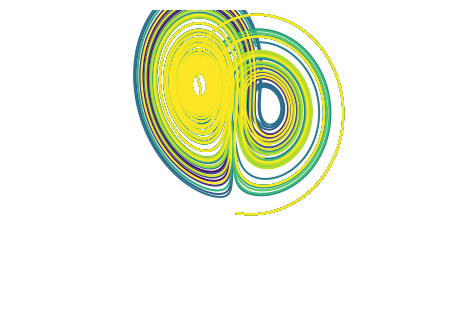

In [106]:
t, x_t = solve_lorenz(angle=0, N=20, max_time=20.5, xmax=30)

# The logistic system 

In [107]:
def logistic_equation(x, r):
    return r * x * (1 - x)

Let's plot this:

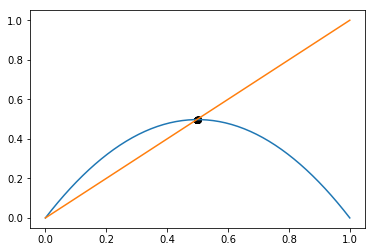

In [123]:
@interact
def plot_logistic(x0=(0.1, 1, 0.1), n=(1, 50), r=(0, 4, 0.01), ax=fixed(None)):
    "Plots logistic regression series."
    # computes iterated values
    vals = [x0]
    for _ in range(n):
        vals.append(logistic_equation(vals[-1], r))
    # plotting
    if ax is None:
        fig, ax = plt.subplots()

    for x_start, x_end in zip(vals[:-1], vals[1:]):
        ax.plot([x_start, x_start, x_end], [x_start, x_end, x_end], '-ko')
    xx = np.linspace(0, 1)
    ax.plot(xx, logistic_equation(xx, r))
    ax.plot(xx, xx)

Waoh this is cool:

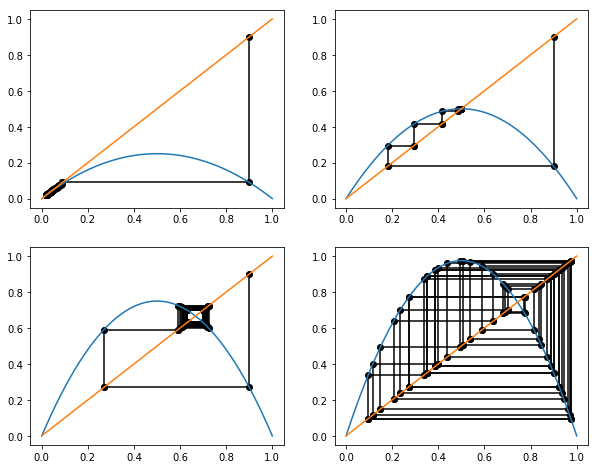

In [124]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(2, 2, 1)
plot_logistic(0.9, 40, 1, ax=ax)
ax = plt.subplot(2, 2, 2)
plot_logistic(0.9, 40, 2, ax=ax)
ax = plt.subplot(2, 2, 3)
plot_logistic(0.9, 40, 3, ax=ax)
ax = plt.subplot(2, 2, 4)
plot_logistic(0.9, 40, 3.9, ax=ax)

Let's make an animation of this.

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

x = np.linspace(-2, 2, 200)

duration = 4

fig, ax = plt.subplots()
def make_frame(t):
    r = t / duration * 3.9
    ax.clear()
    plot_logistic(0.9, 40, r, ax=ax)
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
plt.close(fig)
animation.ipython_display(fps=20, loop=True, autoplay=True)

 99%|█████████████████████████████████████████▍| 80/81 [00:11<00:00,  7.45it/s]


We can do another graphic plot of this.

In [131]:
r = np.linspace(0, 3.9999, num=200)
x0 = np.linspace(0, 1, num=100)
vals = np.empty((r.size, x0.size))
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        def final_value(x, r, iters=100):
            for _ in range(iters):
                x = logistic_equation(x, r)
            return x
        vals[i, j] = final_value(x0[j], r[i])

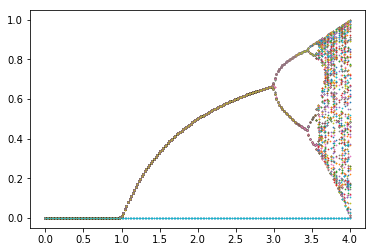

In [145]:
plt.plot([rr * np.ones(vals.shape[0]) for rr in r], [row for row in vals], '.', ms=0.9);

What we see here is that the population has a region where it goes to 0, one where it groes, and one where it can have two values.

# Newton roots

Let's now come to the final problem.

In [152]:
def newton_iter(z, func, func_prime):
    "Newton's method."
    return z - func(z) / func_prime(z)

In [153]:
def func(z):
    "Function to solve zeros for."
    return z**4 - 1

In [154]:
def func_prime(z):
    "Derivative of the above function."
    return 4 * z**3

In [158]:
newton_iter(0 + 1j * 0.1, func, func_prime)

250.07499999999993j

In [159]:
def newton(func, func_prime, z0, iters=50):
    "Apply Newton's method for a number of iterations."
    z = z0
    for _ in range(iters):
        z = newton_iter(z, func, func_prime)
    return z

In [160]:
newton(func, func_prime, 0 + 1j * 0.1)

1j

Now, let's make a map, excluding 0.

In [181]:
real = np.arange(-1.29, 1.29, 0.0011)
grid = real[:, np.newaxis] + 1j * real[np.newaxis, :]

In [182]:
roots = newton(func, func_prime, grid)

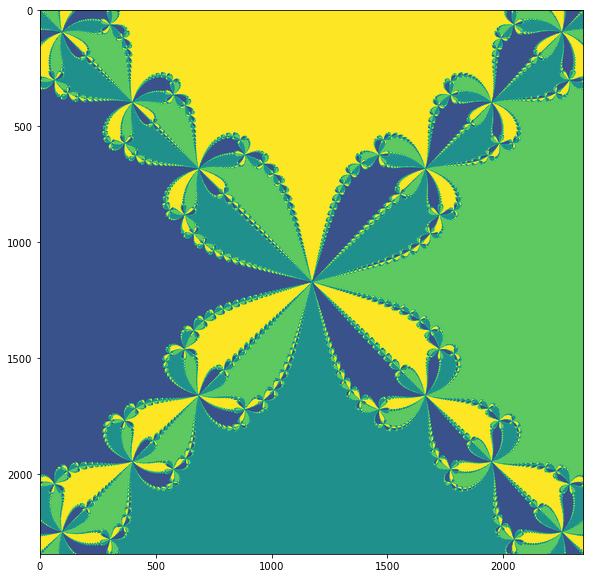

In [183]:
plt.figure(figsize=(10, 10))
plt.imshow(np.angle(roots), interpolation='lanczos')

See more here: http://aleph0.clarku.edu/~djoyce/newton/examples.html